In [9]:
#IMPORTAZIONI E PARAMETRI DI BASE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#dati file con anomalie 
df=pd.read_csv('anomalia_multivariata.csv')

df['datetime'] = pd.to_datetime(df['Timestamp'])

#print(df.columns)

df.set_index('datetime', inplace=True)

#print(df.head()) #controllo il nome esatti delle colonne.

# Feature temporali
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

# Derivate prime
df['dT'] = df['Temperatura (°C)'].diff()
df['dU'] = df['Umidità (%)'].diff()

# Rimuovi eventuali NaN
df.dropna(inplace=True)

# Definizione delle feature
features = ['Temperatura (°C)', 'Umidità (%)']#, 'dT', 'dU', 'hour']
X = df[features]


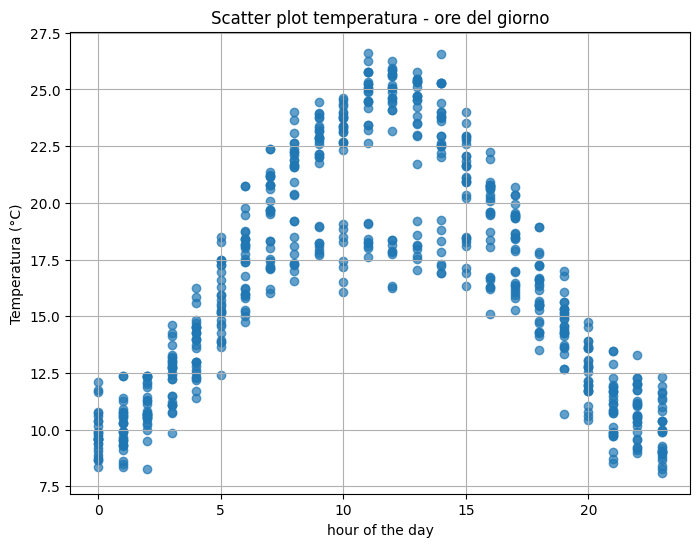

In [2]:
# SCATTER PLOT TEMPERATURA-ORA
plt.figure(figsize=(8, 6))
plt.scatter( X['hour'], X['Temperatura (°C)'], alpha=0.7)


# Identifica l'intervallo da evidenziare
#start = 96*3
#end = 96*4

# Scatter dei dati anomali
#X_anomalo = X.iloc[start:end]
#plt.scatter(X_anomalo['hour'], X_anomalo['Temperatura (°C)'], color='red', label='Intervallo anomalo', alpha=0.9)

plt.ylabel('Temperatura (°C)')
plt.xlabel('hour of the day')
plt.title('Scatter plot temperatura - ore del giorno')
plt.grid(True)
plt.show()

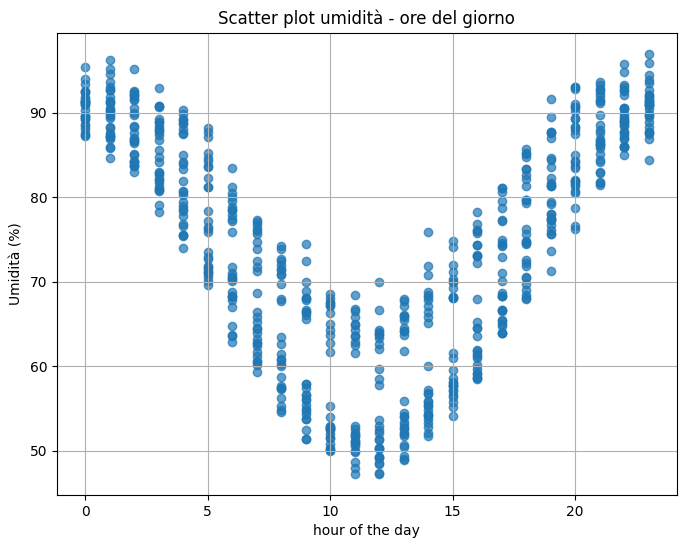

In [3]:
# SCATTER PLOT UMIDITà-ORA
plt.figure(figsize=(8, 6))
plt.scatter( X['hour'], X['Umidità (%)'], alpha=0.7)
plt.ylabel('Umidità (%)')
plt.xlabel('hour of the day')
plt.title('Scatter plot umidità - ore del giorno')
plt.grid(True)
plt.show()

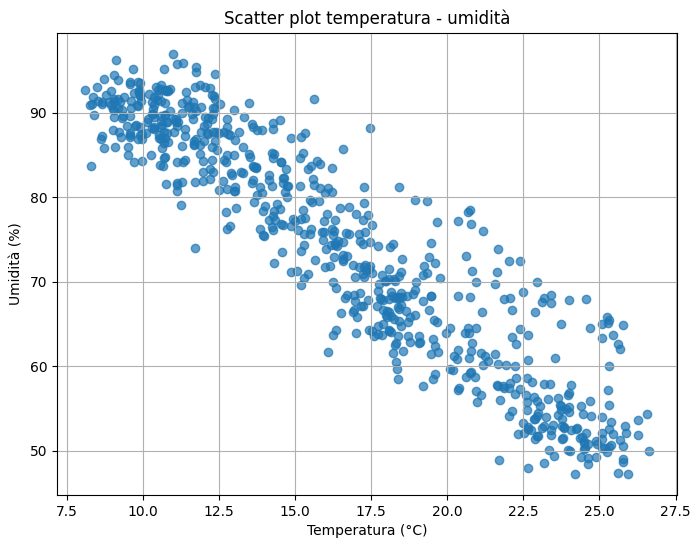

In [4]:
# SCATTER PLOT TEMPERATURA UMIDITà
plt.figure(figsize=(8, 6))
plt.scatter( X['Temperatura (°C)'], X['Umidità (%)'],  alpha=0.7)

# Identifica l'intervallo da evidenziare
#start = 96*3
#end = 96*4

# Scatter dei dati anomali
#X_anomalo = X.iloc[start:end]
#plt.scatter(X_anomalo['Temperatura (°C)'], X_anomalo['Umidità (%)'], color='red', label='Intervallo anomalo', alpha=0.9)

plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidità (%)')
plt.title('Scatter plot temperatura - umidità')
plt.grid(True)
plt.show()

In [10]:
# MODELLO 
model = IsolationForest(contamination=0.14, random_state=42)
model.fit(X)

# Predizione (1 = normale, -1 = anomalia)
df['anomaly'] = model.predict(X)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 se anomalia

# Visualizza anomalie
#print(df[df['anomaly'] == 1].head())  # Mostra le prime anomalie

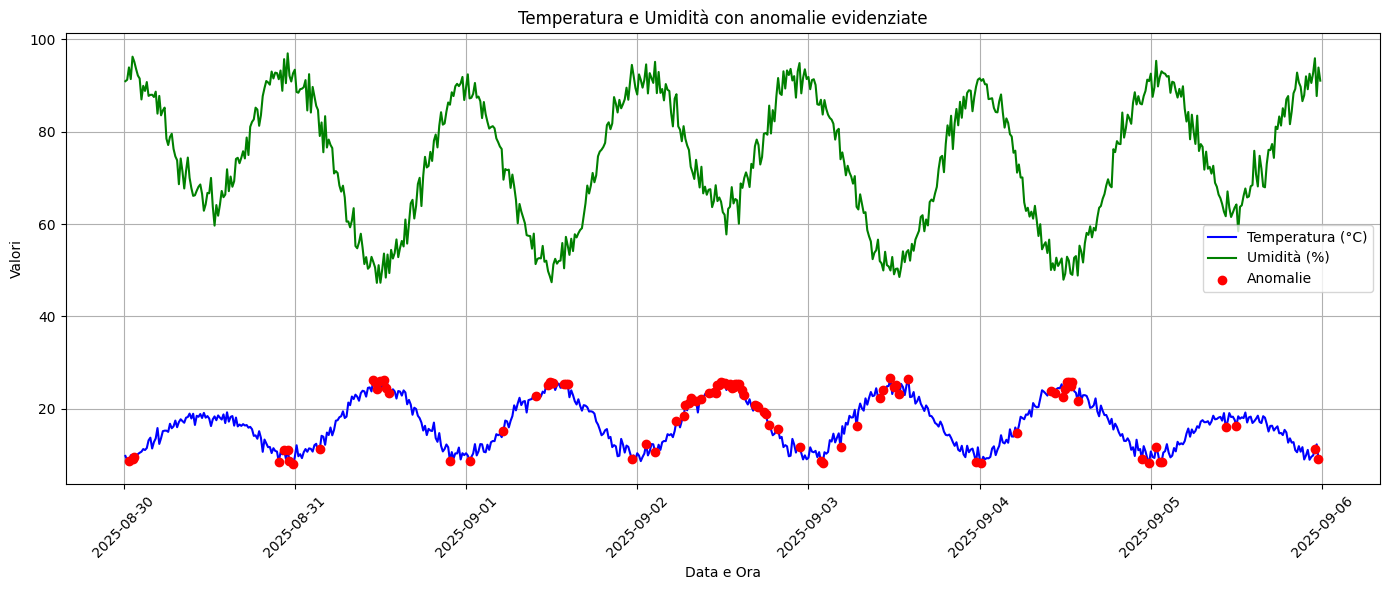

In [11]:
plt.figure(figsize=(14,6))

# Plot delle curve di temperatura e umidità
plt.plot(df.index, df['Temperatura (°C)'], label='Temperatura (°C)', color='blue')
plt.plot(df.index, df['Umidità (%)'], label='Umidità (%)', color='green')

# Estrai solo le anomalie
anomalie = df[df['anomaly'] == 1]

# Scatter dei punti anomali (qui puoi scegliere se temperatura o umidità o entrambi)
plt.scatter(anomalie.index, anomalie['Temperatura (°C)'], color='red', label='Anomalie', zorder=5)

# Setup asse x con giorni e ore leggibili
plt.xlabel('Data e Ora')
plt.ylabel('Valori')
plt.title('Temperatura e Umidità con anomalie evidenziate')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


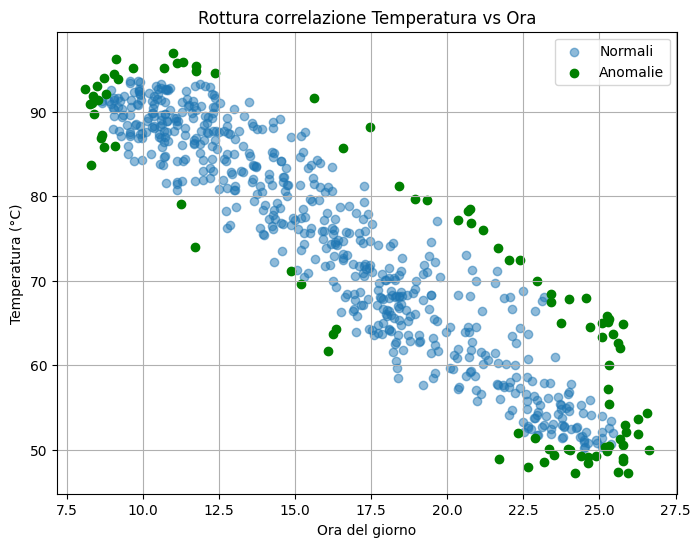

In [12]:
# Plot anomalie rilevate dal modello
normal = df[df['anomaly'] == 0]
anomaly = df[df['anomaly'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(normal['Temperatura (°C)'], normal['Umidità (%)'], label='Normali', alpha=0.5)
plt.scatter(anomaly['Temperatura (°C)'], anomaly['Umidità (%)'], color='green', label='Anomalie')
plt.xlabel('Ora del giorno')
plt.ylabel('Temperatura (°C)')
plt.title('Rottura correlazione Temperatura vs Ora')
plt.legend()
plt.grid(True)
plt.show()

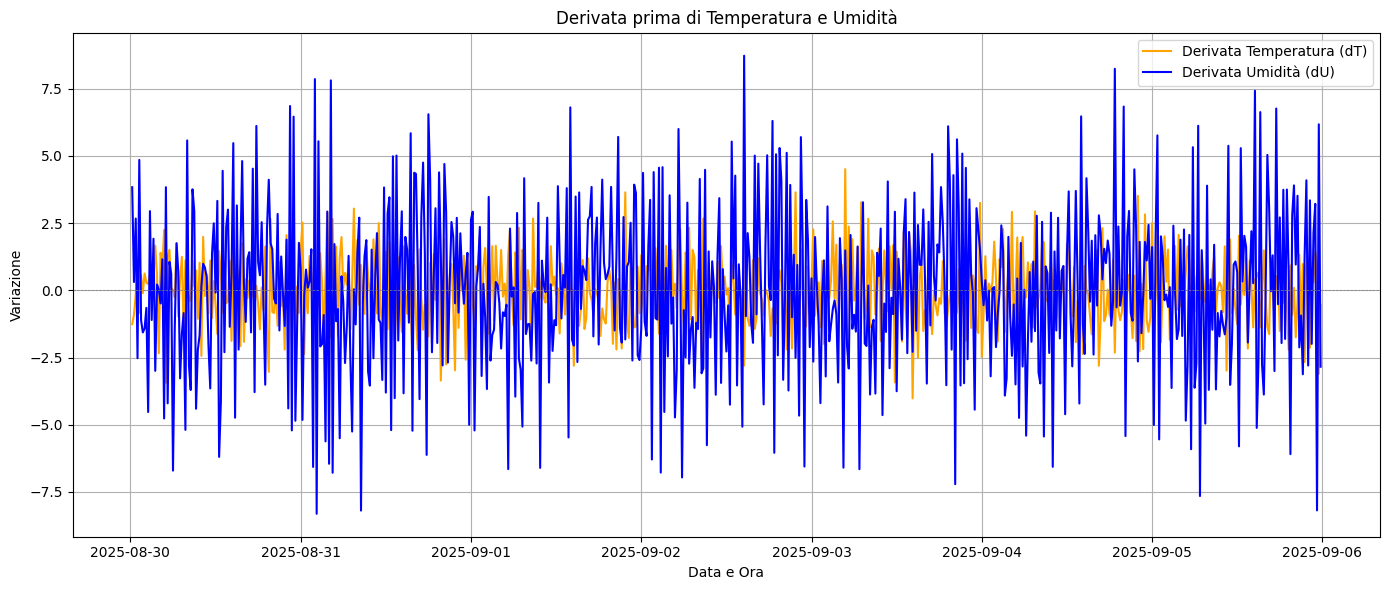

In [8]:
#Grafico: derivate di temperatura e umidità
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['dT'], label='Derivata Temperatura (dT)', color='orange')
plt.plot(df.index, df['dU'], label='Derivata Umidità (dU)', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Derivata prima di Temperatura e Umidità')
plt.xlabel('Data e Ora')
plt.ylabel('Variazione')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()